# Proyecto integrado

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats as st
import math
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

## 1.Cargar los datos

In [2]:
games=pd.read_csv('./games.csv')

## 2.Preparar los datos

In [3]:
## Información general/resumida sobre el DataFrame .

games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Se observa un dataframe con 16715 entradas y 11 columnas. La columna Name se observa que contiene nulos y está en su tipo de datos correcto. Platform no tiene valores nulos y el tipo de dato es correcto. Year_of_Release también contiene valores nulos y en este caso el topo de dato es incorrecto, tendría que ser entero. Genre también contiene valores nulos y el topo de dato es correcto. NA_sales, EU_sales, JP_sales y Other_sales no contienen valores nulos y el tipo de dato es correcto. Critic_Score tiene muchos valores nulos y el tipo de dato es float64 pero tendría que cambiarse a entero. User_Score contiene valores nulos y el topo de dato es incorrecto. Rating contiene valores nulos y el tipo de datos es correcto. 

In [5]:
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
games.columns=games.columns.str.lower()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Tratar valores ausentes

In [6]:
#name 
games['name']=games['name'].fillna('unknown')


In [7]:
#year_of_release
#observamos que la media para este campo es 2006 y la media 2007, al ver que estos datos son muy cercanos, estos valores se llenarán con la media.
median=games['year_of_release'].median()
print(median)

games['year_of_release']=games['year_of_release'].fillna(2006)

2007.0


In [8]:
#genre 
games['genre']=games['genre'].fillna('unknown')

In [9]:
#critic_score. Al ser un porcentaje muy alto de ausentes y se llenará dejarán esos valores como ausentes .

#games['critic_score'].unique()

In [10]:
#user_score 
#Al ser un porcentaje muy grande y al conetener muchas filas con tbd no se tratarán los valores ausentes
#En caso de que se necesiten anlizar/tratar estos datos se llenarán en su momento.
#games['user_score']=games['user_score'].fillna(0)

games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
#rating 
#Se llenarán con RP (Rating Pending): Clasificación pendiente. Esto significa que el juego ha sido enviado a la ESRB y está esperando una clasificación final.
games['rating']=games['rating'].fillna('RP')

In [12]:
#comprobamos que no haya más valores nulos
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Cambiar tipos de datos al correcto

In [13]:
#year_of_release
#Se cambia a tipo int porque el año tiene que ser entero.

games['year_of_release']=games['year_of_release'].astype(int)

games['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: int64

In [14]:
#critic_score
#observamos los valores unicos para comprobar que todos los valores tienen terminación en ".0" 
#aunque hasta ahora no cambiaremos el tipo de dato, se hará la comprobación para saber si se pueden cabiar después.
unique_values=games['critic_score'].unique()
unique_values

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
#critic_score 
#no cambiaremos esta columna porque contiene aún valores nulos 

In [16]:
#user_score 
#no cambiaremos esta columna porque contiene aún valores nulos y tbd que es str 

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


#### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [18]:
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games[['name','total_sales']].head(15)

,name,total_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38
5,Tetris,30.26
6,New Super Mario Bros.,29.80
7,Wii Play,28.91
8,New Super Mario Bros. Wii,28.32
9,Duck Hunt,28.31


## 3. Analisis de los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período? 

<Axes: title={'center': 'Juegos lanzados por año'}, xlabel='Año de lanzamiento', ylabel='Número de juegos lanzados'>

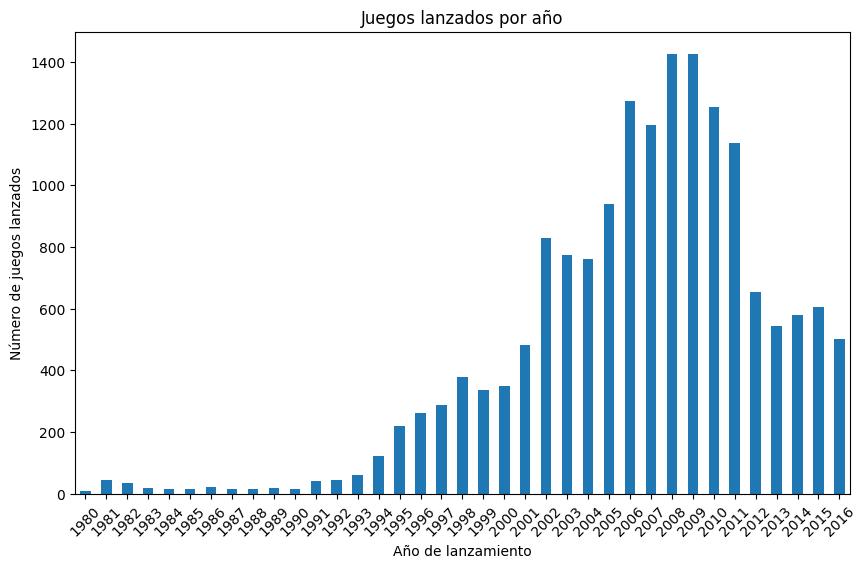

In [19]:
period=games.groupby('year_of_release')['name'].count().reset_index()
period.columns=['year_of_release','number_of_games']
period.plot(kind='bar',
            x='year_of_release',
            y='number_of_games',
            xlabel='Año de lanzamiento',
            ylabel='Número de juegos lanzados',
            title='Juegos lanzados por año',
            rot=45,
            figsize=(10,6),
            legend=False
            )

Se observa que en 1980 sólo se lanzaon 9 videojuegos, el número fue aumentando y el pico más alto es en los años 2008 y 2009 con 1427 y 1426 respectivamente. A partir de 2010 comenzaron a disminuir hasta llegar a 502 juegos en el 2016.

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 
Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [20]:
top_sales_platform=games.groupby('platform')['total_sales'].sum().reset_index()
top_sales_platform=top_sales_platform.sort_values(by='total_sales', ascending=False)
#Elegimos el top 10 
top_sales_platform=top_sales_platform['platform'].head(10)


In [21]:
top_sales_platforms=games[games['platform'].isin(top_sales_platform)]
#Agrupamos las ventas por año y por plataforma
sales_by_year_platform=top_sales_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()


In [22]:
sales_by_year_platform
#Decido dejar los valores nulos para observar mejor gráicamente en qué año se lanzó la platafoma

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Juegos con mayores ventas por año'}, xlabel='Nombre', ylabel='Total de ventas(millones)'>

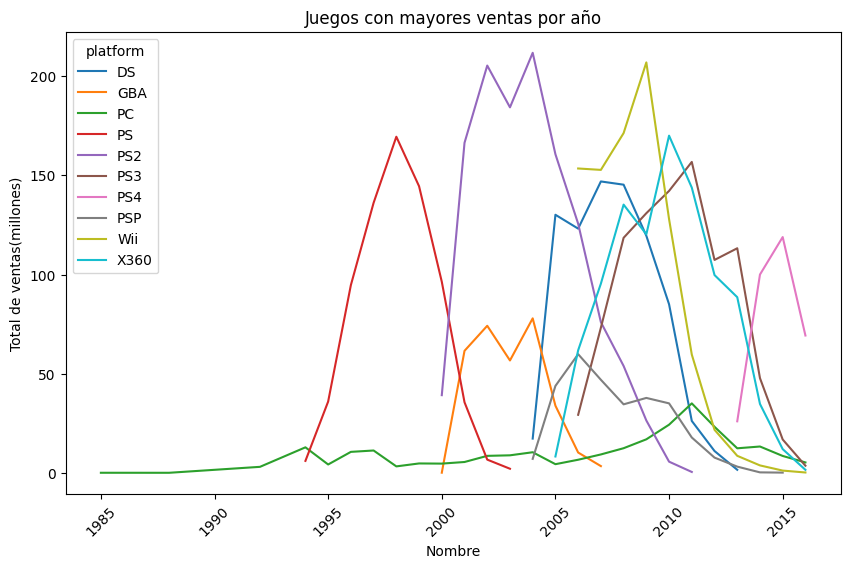

In [23]:
sales_by_year_platform.plot(kind='line',
            xlabel='Nombre',
            ylabel='Total de ventas(millones)',
            title='Juegos con mayores ventas por año',
            rot=45,
            figsize=(10,6),
            )

#creamos gráfico de líneas para ver la variación de las ventas de cada plataforma 

Se observa que de 1985 a 1999 sólo figuraban PC y PS y PS2, del 2000 al 2006 se lanzaron GBA, DS, PSP, X360, WII y PS3. A partir de ahí se hizo una pausa hasta 2013 que se lanzó PS4. Se Observa que a pesar de ser el que tiene menores ventas, PS mantiene sus ventas hasta el 2016. Se observa que las plataformas que pierden popularidad rápidamente son los que  tienen nuevas versiones (PS, PS2, PS3, PS4), eso se debe a que los usuarios no acostumbran a comprar la primera versión si es que ya exite la 4.Por otro lado, se observa que Wii es la plataforma que tuvo más exito en su año de lanzamiento que todos los demás y a partir del 2011 comenzó a perder popularidad rápidamente.

In [24]:
#Análisis del top 10 y un periodo de 6 años 
top_games2010=games[games['year_of_release']>=2010]

top_games=top_games2010.groupby('platform')['total_sales'].sum().reset_index()
top_games=top_games.sort_values(by='total_sales', ascending=False)
#Elegimos el top 10
top10platforms=top_games['platform'].head(10)
top_games=top_games2010[top_games2010['platform'].isin(top10platforms)]

#Por ventas y año 2010
sales2010=top_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

sales2010

platform,3DS,DS,PC,PS3,PS4,PSP,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2010,NaN,85.02,24.28,142.17,NaN,35.04,127.95,NaN,170.03,NaN
2011,63.20,26.18,35.03,156.78,NaN,17.82,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,107.36,NaN,7.69,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,0.18,4.60,1.52,26.15


<Axes: title={'center': 'Juegos con mayores ventas por año'}, xlabel='Nombre', ylabel='Total de ventas(millones)'>

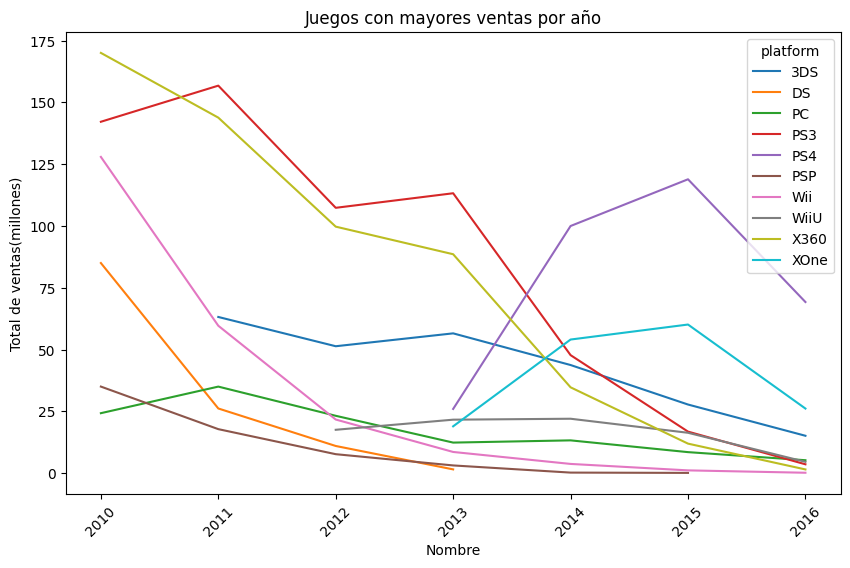

In [25]:
sales2010.plot(kind='line',
            xlabel='Nombre',
            ylabel='Total de ventas(millones)',
            title='Juegos con mayores ventas por año',
            rot=45,
            figsize=(10,6),
            )

#creamos gráfico de líneas para ver la variación de las ventas de cada plataforma 

Se observa que a pesar de que en 2010 X360 era el que tenía un mayor número de ventas, en 2010 y las ventas de este fueron disminuyendo. También se observa que PS3, Wii, DS, PSP fueron perdidendo popularidad. PS4 y Xbox One que fueron lanzados en 2013 en 2016 mantenían los primeros lugares en ventas, esto sugiere que las plataformas que sacan una nueva versión, estas alcanzan popularidad rápidamente. También se observa el caso de DS que aunque sólo ha lanzado esta plataforma desde 2011 también ha alcanzado una gran catidad de ventas hasta 2016.


Comprobación mediante código:
  

In [26]:
#Busca las plataformas que solían ser populares pero que ahora no tienen ventas.
recent_year = 2016
past_sales=top_games[(top_games['year_of_release']<recent_year)&(top_games['total_sales']>0)].groupby('platform')['total_sales'].sum()
recent_sales=top_games[(top_games['year_of_release']>=recent_year)&(top_games['total_sales']>0)].groupby('platform')['total_sales'].sum()

not_popular_now=past_sales[~past_sales.index.isin(recent_sales.index)]
not_popular_now

platform
DS     123.75
PSP     64.05
Name: total_sales, dtype: float64

In [27]:
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? 
lifetime=top_games.groupby('platform')['year_of_release'].agg(['min','max'])
lifetime['duracion_years']=lifetime['max']-lifetime['min']
lifetime

,min,max,duracion_years
platform,,,
3DS,2011,2016,5
DS,2010,2013,3
PC,2010,2016,6
PS3,2010,2016,6
PS4,2013,2016,3
PSP,2010,2015,5
Wii,2010,2016,6
WiiU,2012,2016,4
X360,2010,2016,6


Se observa que todas las plataformas lanzadas a partir de 2010 siguen con ventas hasta 2016 a excepción de PSP con una duración de 5 años y DS con una duración de 3.

In [28]:
lifetime_mean=lifetime['duracion_years'].mean()
lifetime_mean

np.float64(4.7)

Se observa que el promedio de vida de las plataformas más populares es de 5 años 

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Se observa que para obtener datos completos, tomando en cuenta la media de vida de las plataformas. Se necesitarían los datos de al menos 5 años. 

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [29]:
popular_now=recent_sales.index
print("\nPlataformas con ventas recientes:") 
print(popular_now)

growth = recent_sales-past_sales 
print("\nCrecimiento de las plataformas:") 
print(growth)



Plataformas con ventas recientes:
Index(['3DS', 'PC', 'PS3', 'PS4', 'Wii', 'WiiU', 'X360', 'XOne'], dtype='object', name='platform')

Crecimiento de las plataformas:
platform
3DS    -227.53
DS         NaN
PC     -111.46
PS3    -580.54
PS4    -175.64
PSP        NaN
Wii    -222.61
WiiU    -72.99
X360   -547.37
XOne   -107.02
Name: total_sales, dtype: float64


Se observa que las plataformas que tienen ventas y se sitúan en los primeros lugares de ventas son PS4, XboxOne 3DS y PC. Se observa que todas las plataformas han disminuido sus ventas. 

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? 
¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [30]:
# Filtrar juegos a partir del año 2010 
games_sales_2010 = games[games['year_of_release'] >= 2010] 
# Calcular el rango intercuartílico (IQR) para el filtrado de atípicos 
Q1 = games_sales_2010['total_sales'].quantile(0.25) 
Q3 = games_sales_2010['total_sales'].quantile(0.75) 
IQR = Q3 - Q1 
# Filtrar los valores atípicos 
filtered_games= games_sales_2010[~((games_sales_2010['total_sales']<(Q1-1.5 * IQR))|(games_sales_2010['total_sales']>(Q3 + 1.5 * IQR)))]


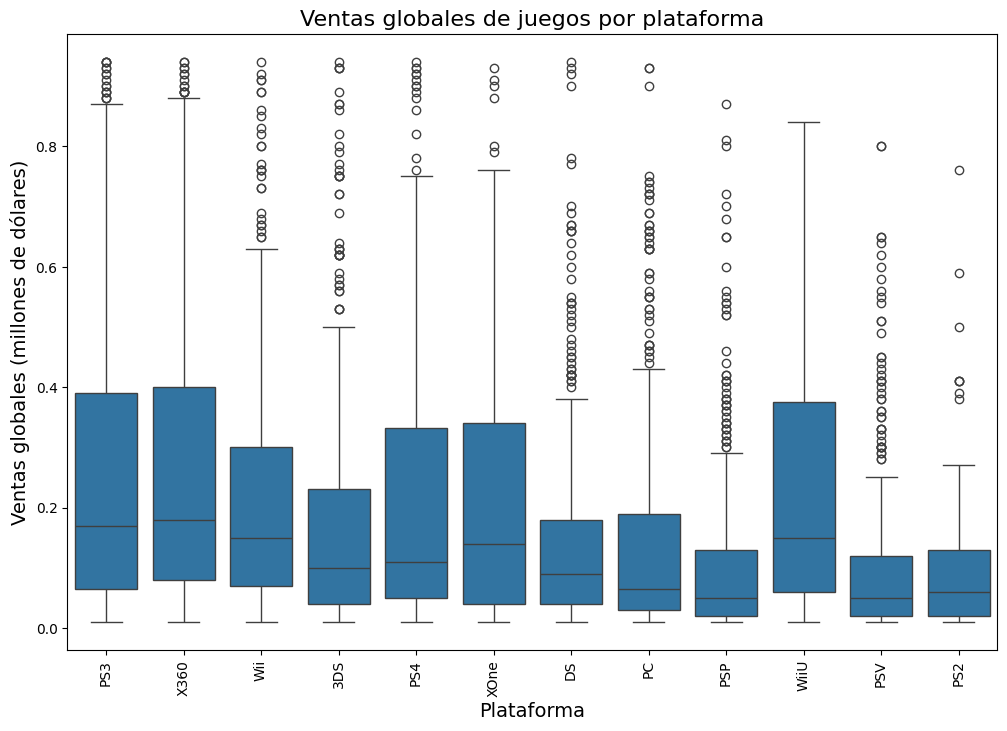

In [31]:
plt.figure(figsize=(12, 8)) 
sns.boxplot(x='platform', y='total_sales', data=filtered_games) 
# Mejorar etiquetas y título del gráfico 
plt.xlabel('Plataforma', fontsize=14) 
plt.ylabel('Ventas globales (millones de dólares)', fontsize=14) 
plt.title('Ventas globales de juegos por plataforma', fontsize=16) 
plt.xticks(rotation=90) 
plt.show()


Se puede observar que en primer lugar está X360, en segundo lugar PS3 y en tercer lugar WiiU, al eliminar los valores atípicos y hacer el filtrado a partir de 2010, se tiene una mejor apreciación respecto a las ventas de los juegos. 

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [32]:
#Se realizará el análisis para Wii 
wii_games=games[(games['platform']=='Wii')&(games['year_of_release']>=2010)]
wii_games['user_score']=pd.to_numeric(wii_games['user_score'], errors='coerce')
wii_games=wii_games.dropna(subset=['user_score', 'critic_score', 'total_sales'])

In [33]:
Q1 = wii_games['total_sales'].quantile(0.25) 
Q3 = wii_games['total_sales'].quantile(0.75) 
IQR = Q3 - Q1 
#filtrado de atípicos
filtered_wii_games = wii_games[~((wii_games['total_sales'] < (Q1 - 1.5 * IQR)) | (wii_games['total_sales'] > (Q3 + 1.5 * IQR)))]

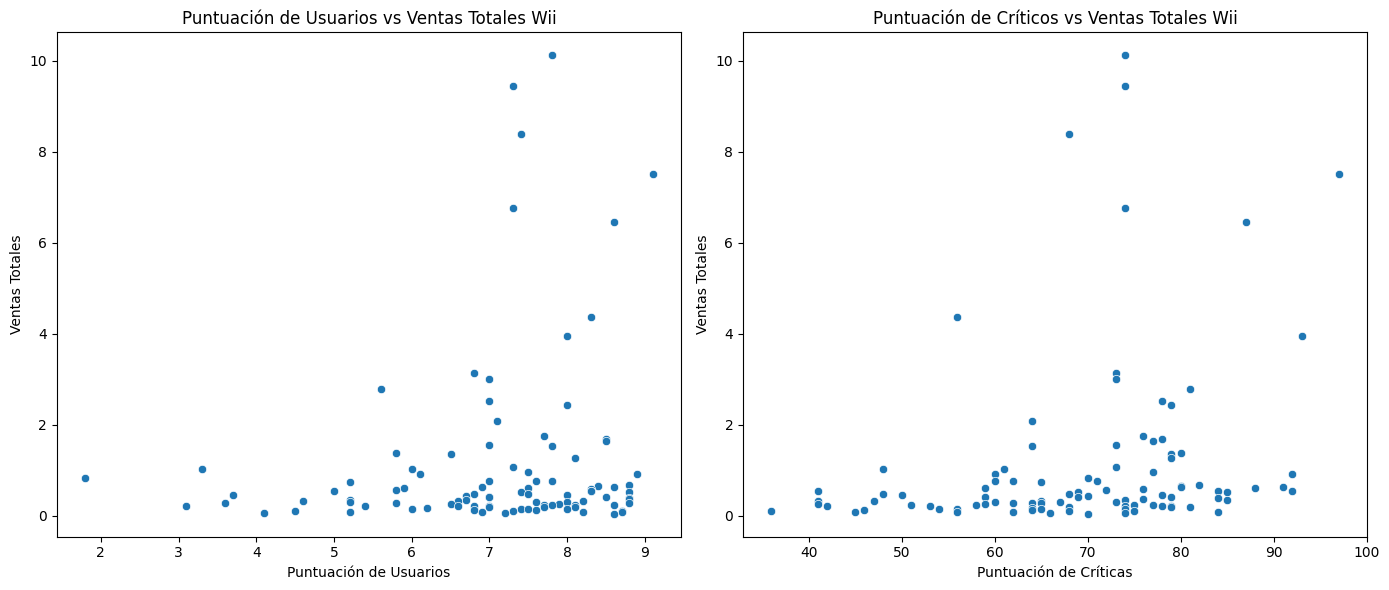

In [34]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=wii_games, x='user_score', y='total_sales') 
plt.xlabel('Puntuación de Usuarios') 
plt.ylabel('Ventas Totales') 
plt.title('Puntuación de Usuarios vs Ventas Totales Wii')

plt.subplot(1, 2, 2) 
sns.scatterplot(data=wii_games, x='critic_score', y='total_sales') 
plt.xlabel('Puntuación de Críticas') 
plt.ylabel('Ventas Totales') 
plt.title('Puntuación de Críticos vs Ventas Totales Wii') 
plt.tight_layout() 
plt.show()

In [35]:
# Correlación entre la puntuación de usuarios y las ventas 
user_corr, _= pearsonr(filtered_wii_games['user_score'], filtered_wii_games['total_sales']) 
# Correlación entre la puntuación de críticos y las ventas 
critic_corr, _= pearsonr(filtered_wii_games['critic_score'], filtered_wii_games['total_sales']) 
print(f"Correlación entre la puntuación de usuarios y las ventas: {user_corr:.2f}") 
print(f"Correlación entre la puntuación de críticos y las ventas: {critic_corr:.2f}")

Correlación entre la puntuación de usuarios y las ventas: 0.05
Correlación entre la puntuación de críticos y las ventas: 0.23


Se observa que la correlación de los críticos y las ventas es más alta que la puntuación de los usuarios pero estos numeros son tan pequeños que no se considera que las puntuaciones influyan en las ventas de la plataforma. 
Se realizará el mismo anális para X360 para saber si en este caso hay una correlación.

In [36]:
#Se realizará el análisis para X360x
x360_games=games[(games['platform']=='X360')&(games['year_of_release']>=2010)]
x360_games['user_score']=pd.to_numeric(x360_games['user_score'], errors='coerce')
x360_games=x360_games.dropna(subset=['user_score', 'critic_score', 'total_sales'])

In [37]:
Q1 = x360_games['total_sales'].quantile(0.25) 
Q3 = x360_games['total_sales'].quantile(0.75) 
IQR = Q3 - Q1 
#filtrado de atípicos
filtered_x360_games = x360_games[~((wii_games['total_sales'] < (Q1 - 1.5 * IQR)) | (x360_games['total_sales'] > (Q3 + 1.5 * IQR)))]

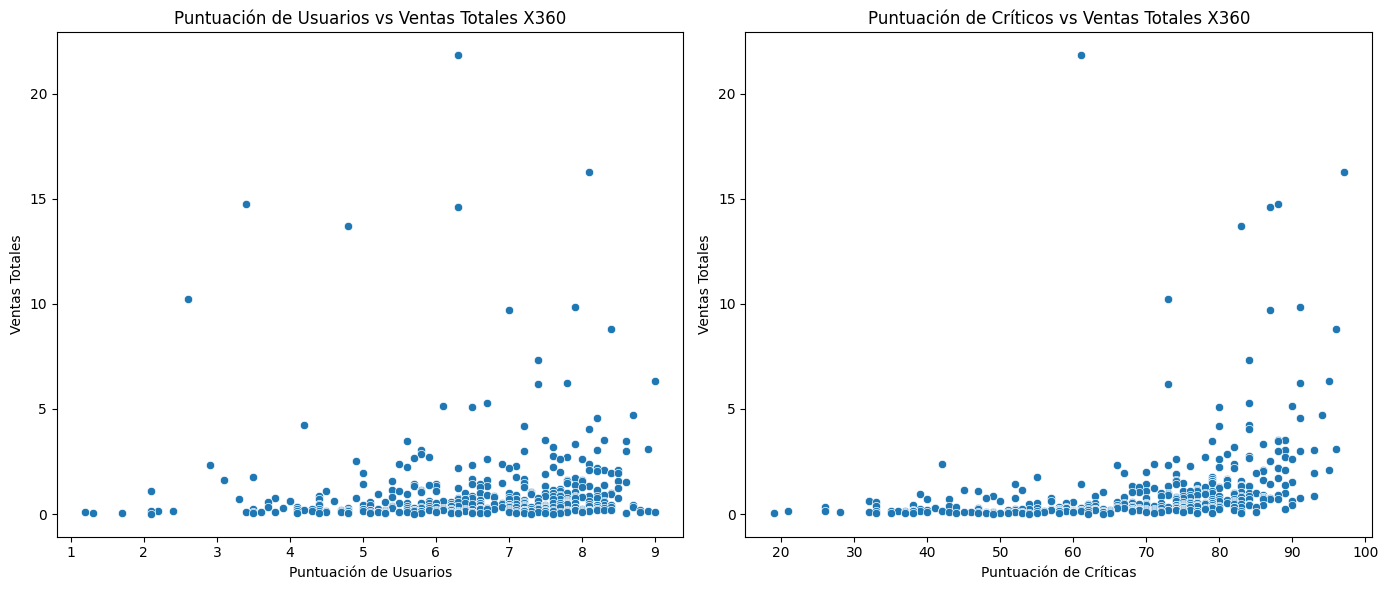

In [38]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) 
sns.scatterplot(data=filtered_x360_games, x='user_score', y='total_sales') 
plt.xlabel('Puntuación de Usuarios') 
plt.ylabel('Ventas Totales') 
plt.title('Puntuación de Usuarios vs Ventas Totales X360')

plt.subplot(1, 2, 2) 
sns.scatterplot(data=filtered_x360_games, x='critic_score', y='total_sales') 
plt.xlabel('Puntuación de Críticas') 
plt.ylabel('Ventas Totales') 
plt.title('Puntuación de Críticos vs Ventas Totales X360') 
plt.tight_layout() 
plt.show()

In [39]:
# Correlación entre la puntuación de usuarios y las ventas 
user_corr2, _= pearsonr(filtered_x360_games['user_score'], filtered_x360_games['total_sales']) 
# Correlación entre la puntuación de críticos y las ventas 
critic_corr2, _= pearsonr(filtered_x360_games['critic_score'], filtered_x360_games['total_sales']) 
print(f"Correlación entre la puntuación de usuarios y las ventas: {user_corr2:.2f}") 
print(f"Correlación entre la puntuación de críticos y las ventas: {critic_corr2:.2f}")

Correlación entre la puntuación de usuarios y las ventas: 0.06
Correlación entre la puntuación de críticos y las ventas: 0.34


En este caso se observa que la correlación de Wii y X360 en el caso de los usuarios es la misma, es una correlación baja que hay un impacto mínimo con las compras. 
En cambio, en el caso de la puntuación de críticos, se observa una correlación más grande, en este caso ya es una correlación moderada y esto sugiere que hay una mayor influencia entre estas críticas y las ventas totales de las plataformas. 

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [40]:
games_sales_2010
#Filtración de lista de nombre unicos en wii y los que igual están en X360
games_wii=games_sales_2010[games_sales_2010['platform']=='Wii']['name'].unique()
games_x360=games_sales_2010[(games_sales_2010['platform']=='X360')&(games_sales_2010['name'].isin(games_wii))]['name']

#Filtración de las ventas de los juegos en común 
filtered_sales=games_sales_2010[(games_sales_2010['name'].isin(games_x360))&(games_sales_2010['platform'].isin(['Wii','X360']))]
filtered_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+,10.12
116,Just Dance 4,Wii,2012,Misc,4.05,2.16,0.00,0.55,74.0,7.3,E10+,6.76
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,6.70
...,...,...,...,...,...,...,...,...,...,...,...,...
16044,Turbo: Super Stunt Squad,Wii,2013,Sports,0.00,0.01,0.00,0.00,NaN,tbd,E,0.01
16109,Winter Sports 3: The Great Tournament,X360,2010,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16312,Monster High: New Ghoul in School,Wii,2015,Action,0.00,0.01,0.00,0.00,NaN,tbd,E,0.01
16450,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01


In [41]:
#Obtención del top10 de ventas de ambas plataformas
top_games_sales=filtered_sales.groupby('name').agg({'total_sales':sum}).reset_index()
top_games_sales=top_games_sales.sort_values(by='total_sales', ascending=False)
top10_games_sales=top_games_sales.head(10)
top10_games_sales

,name,total_sales
17,Call of Duty: Black Ops,15.99
18,Call of Duty: Modern Warfare 3,15.56
58,Just Dance 3,12.14
150,Zumba Fitness,9.07
59,Just Dance 4,7.94
38,FIFA Soccer 13,5.85
79,Michael Jackson: The Experience,5.24
34,FIFA 12,4.93
35,FIFA 14,4.60
37,FIFA Soccer 11,4.59


In [42]:
#Agrupación del top10 por nombre y plataforma para poder graficar y comparar
group_sales=filtered_sales.groupby(['name','platform']).agg({'total_sales':sum}).reset_index()
#Filtraición del nombre
top10_names=top10_games_sales['name']
top10_grouped=group_sales[group_sales['name'].isin(top10_names)]

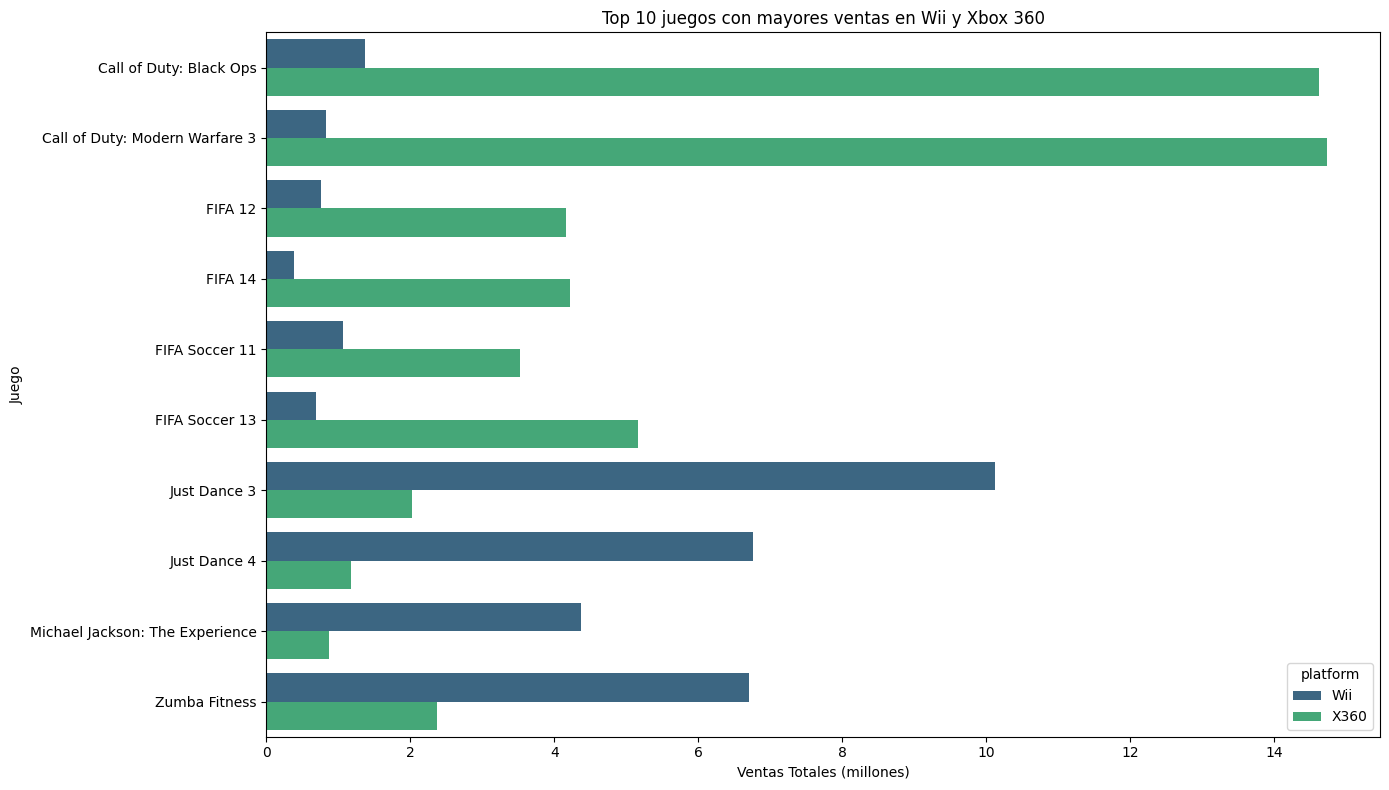

In [43]:
plt.figure(figsize=(14, 8)) 
sns.barplot(data=top10_grouped, x='total_sales', y='name', hue='platform', palette='viridis') 
plt.xlabel('Ventas Totales (millones)') 
plt.ylabel('Juego') 
plt.title('Top 10 juegos con mayores ventas en Wii y Xbox 360') 
plt.tight_layout() 
plt.show()

Se puede observar que las 3 primeras posiciones (juegos con más ventas), tienen una mayor preferencia por usuarios de X360, Guitar Hero es preferido de igual forma por usuarios de ambas plataformas. Just dance tiene mayor preferencia por usuarios de Wii al igual que Zumba Fitnes, esto es por ser un juego en donde los usuarios se ocupan una mayor parte de su cuerpo para jugar. Se observa que los juegos de baile son preferidos por usuarios de Wii mientras que los usuarios de X360 prefieren juegos de acción. 

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [44]:
games_sales_2010
games_by_genre=games_sales_2010.groupby(['genre','name'])['total_sales'].sum().reset_index()
games_by_genre=games_by_genre.sort_values(by='total_sales', ascending=False)
games_by_genre

,genre,name,total_sales
273,Action,Grand Theft Auto V,56.58
2542,Shooter,Call of Duty: Modern Warfare 3,30.60
2539,Shooter,Call of Duty: Black Ops II,29.40
2537,Shooter,Call of Duty: Black Ops,29.20
2540,Shooter,Call of Duty: Ghosts,27.39
...,...,...,...
1021,Adventure,Marginal #4: Idol of Supernova,0.01
1052,Adventure,Natsuzora no Monologue,0.01
1058,Adventure,No Fate! Only the Power of Will,0.01
1060,Adventure,Nyaruko-San: Nafushigatai Game no You na Mono,0.01


In [45]:
# Calcular el rango intercuartílico (IQR) para el filtrado de atípicos 
Q1 = games_sales_2010['total_sales'].quantile(0.25) 
Q3 = games_sales_2010['total_sales'].quantile(0.75) 
IQR = Q3 - Q1 
# Filtrar los valores atípicos 

filtered_genres=games_by_genre[~((games_by_genre['total_sales'] < (Q1 - 1.5 * IQR)) | (games_by_genre['total_sales'] > (Q3 + 1.5 * IQR)))]

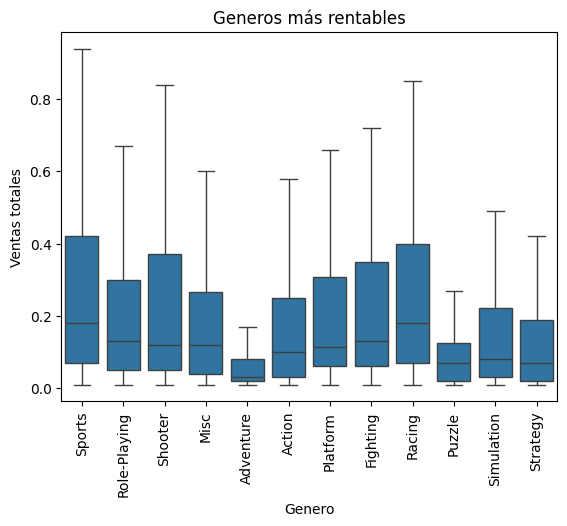

In [46]:
sns.boxplot(x='genre', y='total_sales', data=filtered_genres, showfliers=False)

plt.xlabel('Genero') 
plt.ylabel('Ventas totales') 
plt.title('Generos más rentables') 
plt.xticks(rotation=90) 
plt.show()

Se observa que los generos más rentables son los deportes, acción y carreras y los menos resntables son de aventura y rompecabezas. 

## 4. Crea un perfil de usuario para cada región

### Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [47]:
#Ventas por plataformas
games2010=games[games['year_of_release'] >= 2010]
sales_by_platform=games2010.groupby('platform').sum()

top_platforms_na=sales_by_platform['na_sales'].nlargest(5)
top_platforms_eu=sales_by_platform['eu_sales'].nlargest(5)
top_platforms_jp=sales_by_platform['jp_sales'].nlargest(5)

print('El top 5 plataformas en NA es: \n', top_platforms_na)
print('El top 5 plataformas en NA es: \n', top_platforms_eu)
print('El top 5 plataformas en NA es:\n ', top_platforms_jp)

El top 5 plataformas en NA es: 
 platform
X360    334.18
PS3     229.25
Wii     121.20
PS4     108.74
XOne     93.12
Name: na_sales, dtype: float64
El top 5 plataformas en NA es: 
 platform
PS3     213.60
X360    163.41
PS4     141.09
PC       68.82
Wii      65.91
Name: eu_sales, dtype: float64
El top 5 plataformas en NA es:
  platform
3DS    100.62
PS3     59.26
PSP     42.20
DS      27.90
PSV     21.84
Name: jp_sales, dtype: float64


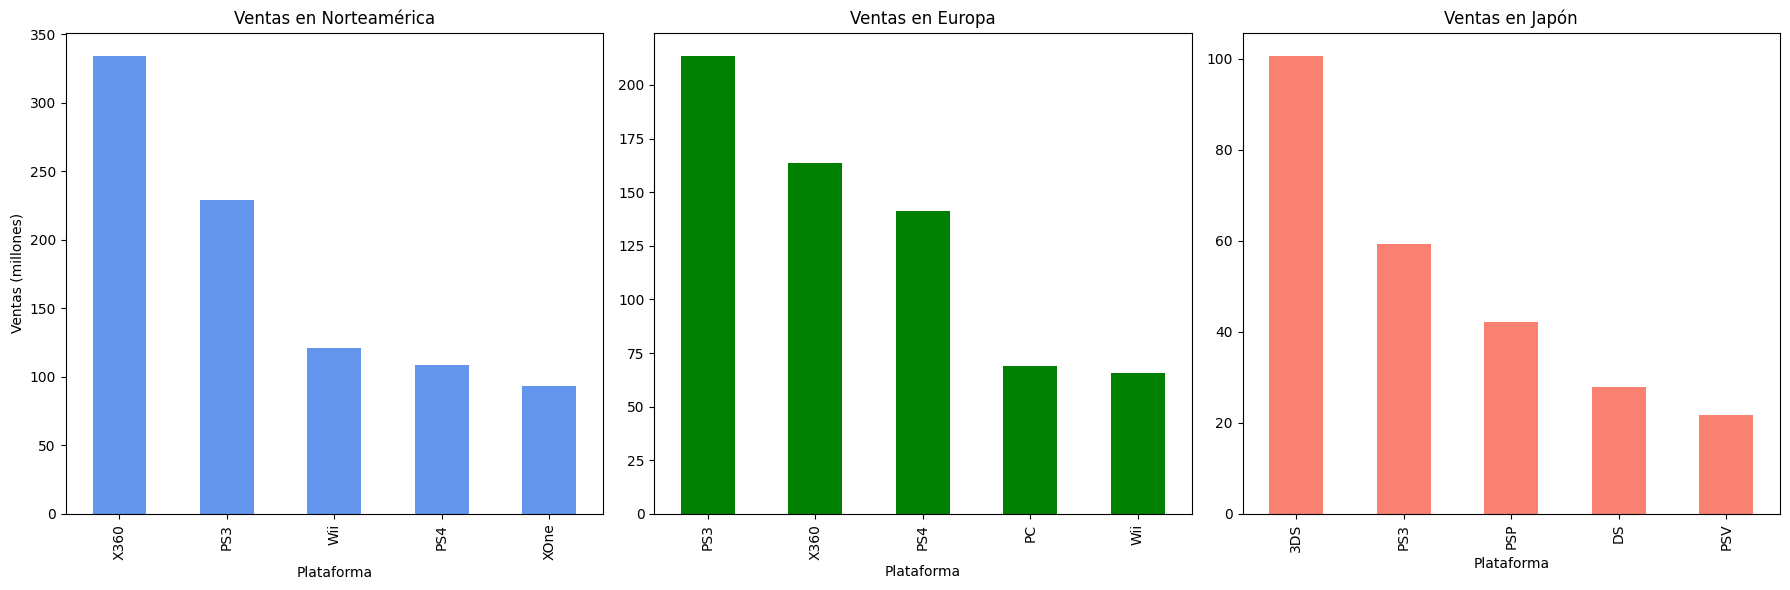

In [48]:
plt.figure(figsize=(18, 6)) 
#Norte America 
plt.subplot(1, 3, 1)
top_platforms_na.plot(kind='bar', color='cornflowerblue') 
plt.title('Ventas en Norteamérica') 
plt.xlabel('Plataforma') 
plt.ylabel('Ventas (millones)') 
#Europa 
plt.subplot(1, 3, 2) 
top_platforms_eu.plot(kind='bar', color='green') 
plt.title('Ventas en Europa') 
plt.xlabel('Plataforma') 
#Japón 
plt.subplot(1, 3, 3) 
top_platforms_jp.plot(kind='bar', color='salmon') 
plt.title('Ventas en Japón') 
plt.xlabel('Plataforma') 
plt.tight_layout() 
plt.show()

Se observa que en Norteamérica se tiene preferencia en primer lugar por X360 seguido de PS3 y Wii y en último lugar por XOne. En Europa se tiene preferencia en primer lugar por PS3, X360 y en tercer lugar se tiene PS4, finalmente se tiene Wii. En Japón se tiene preferencia en primer lugar por 3DS, se observa tambiíen que se tiene preferencia en cuarto y quinto lugar por DS y PSV, plataformas que no figuran en Norteamérica. 

Los cinco géneros principales. Explica la diferencia.

In [49]:
#Ventas por género
sales_by_platform=games2010.groupby('genre').sum()

top_genres_na=sales_by_platform['na_sales'].nlargest(5)
top_genres_eu=sales_by_platform['eu_sales'].nlargest(5)
top_genres_jp=sales_by_platform['jp_sales'].nlargest(5)

print('El top 5 génreros en NA es: \n', top_genres_na)
print('El top 5 géneros en NA es: \n', top_genres_eu)
print('El top 5 géneros en NA es:\n ', top_genres_jp)

El top 5 génreros en NA es: 
 genre
Action          290.64
Shooter         237.47
Sports          156.81
Misc            123.80
Role-Playing    112.05
Name: na_sales, dtype: float64
El top 5 géneros en NA es: 
 genre
Action          233.63
Shooter         171.45
Sports          116.84
Role-Playing     75.48
Misc             66.09
Name: eu_sales, dtype: float64
El top 5 géneros en NA es:
  genre
Role-Playing    103.54
Action           72.20
Misc             24.29
Platform         15.81
Adventure        15.67
Name: jp_sales, dtype: float64


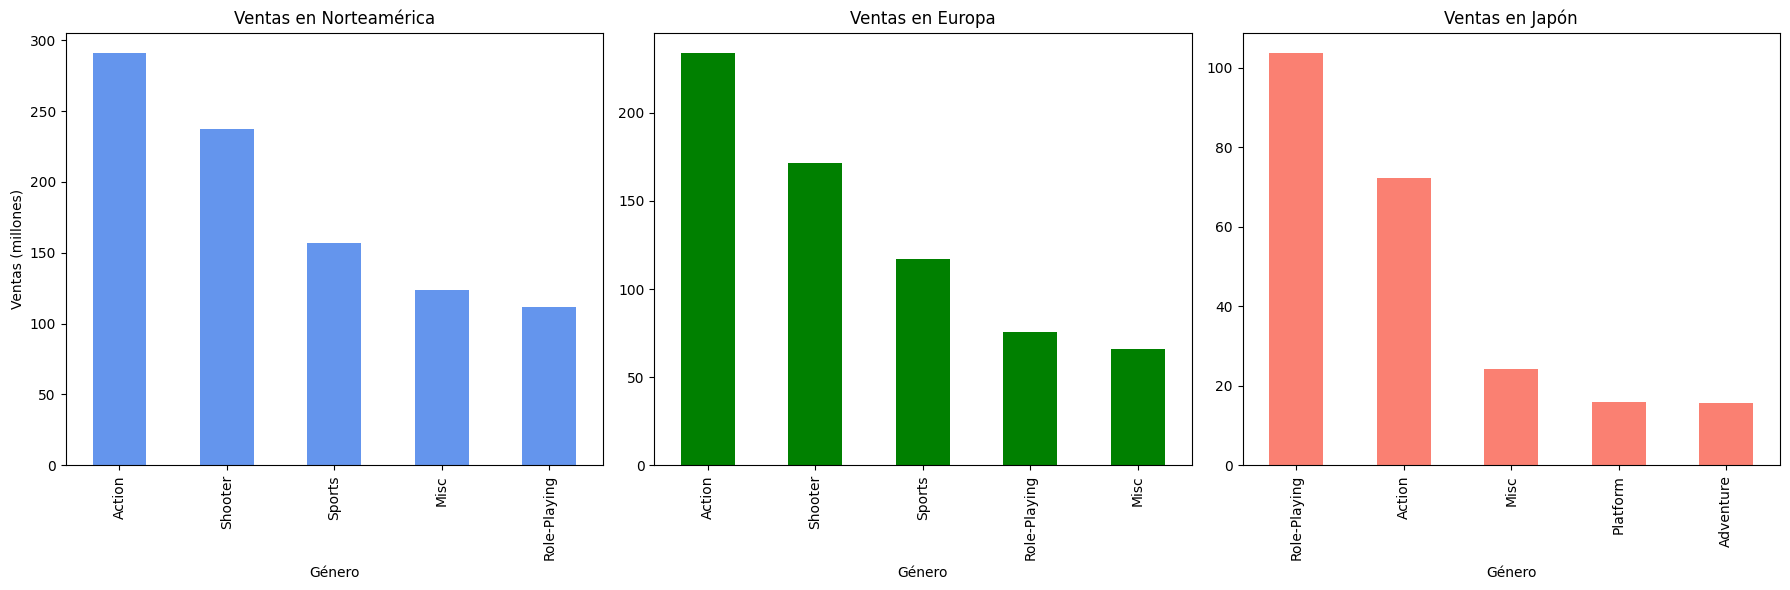

In [50]:
plt.figure(figsize=(18, 6)) 
#Norteamerica 
plt.subplot(1, 3, 1)
top_genres_na.plot(kind='bar', color='cornflowerblue') 
plt.title('Ventas en Norteamérica') 
plt.xlabel('Género') 
plt.ylabel('Ventas (millones)') 
#Europa 
plt.subplot(1, 3, 2) 
top_genres_eu.plot(kind='bar', color='green') 
plt.title('Ventas en Europa') 
plt.xlabel('Género') 
#Japón 
plt.subplot(1, 3, 3) 
top_genres_jp.plot(kind='bar', color='salmon') 
plt.title('Ventas en Japón') 
plt.xlabel('Género') 
plt.tight_layout() 
plt.show()

Se observa que las tendencias en Norteamérica y Europa son muy parecidas en 4 de los 5 géneros más populares, ocupando el primer lugar Ación y Shooter. En japón se observa que el género más preferido por los usuarios es juego de rol, superando el doble de ventas que cualquiera de los otros géneros. a partir del segundo género se observa una preferencia similar que Norteamérica y Europa. 

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [51]:
#Ventas por clasificación 
esrb_sales=games2010.groupby('rating').agg({
    'na_sales':'sum',
    'eu_sales':'sum',
    'jp_sales':'sum',
}).reset_index()

esrb_sales

,rating,na_sales,eu_sales,jp_sales
0,E,271.15,197.34,47.87
1,E10+,159.38,99.28,13.22
2,EC,1.13,0.00,0.00
3,M,382.22,292.04,30.45
4,RP,155.72,139.47,171.49
5,T,160.81,113.08,42.11


Text(0.5, 1.0, 'Ventas por Clasificación ESRB')

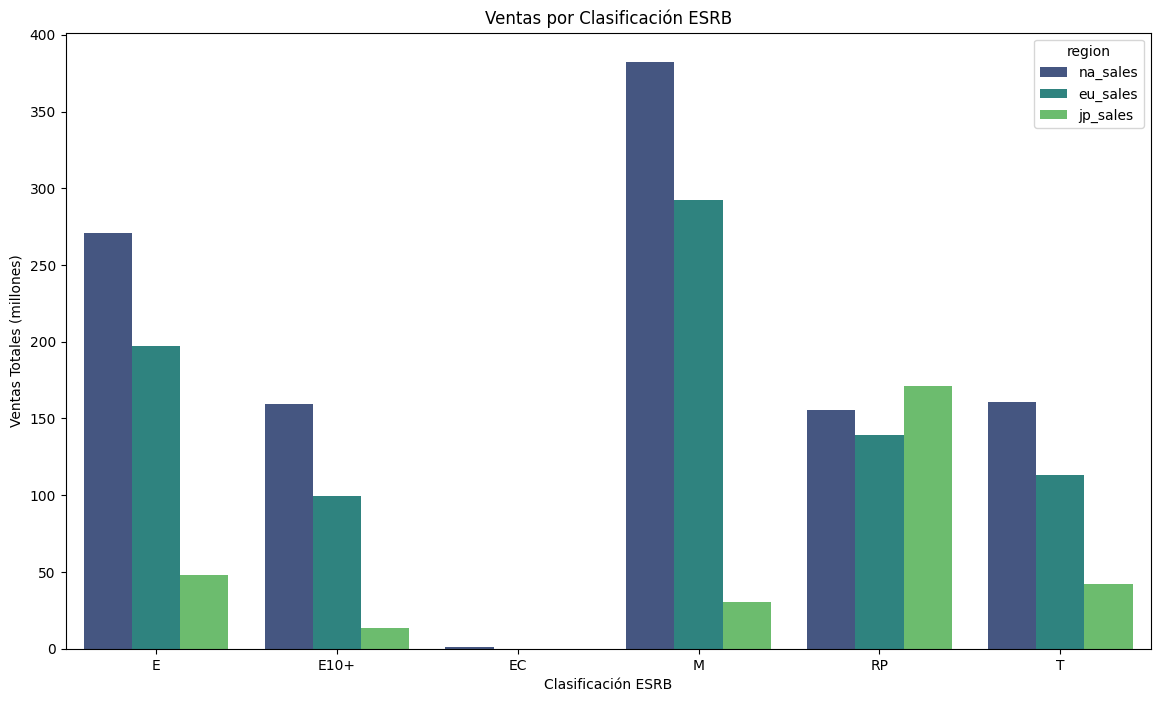

In [52]:
plt.figure(figsize=(14, 8)) 
# Crear un gráfico de barras apiladas 
esrb_sales_melted = esrb_sales.melt(id_vars='rating', value_vars=['na_sales', 'eu_sales', 'jp_sales'], var_name='region', value_name='sales') 

esrb_sales=esrb_sales.sort_values(by='rating', ascending=False)

sns.barplot(data=esrb_sales_melted, x='rating', y='sales', hue='region', palette='viridis') 
plt.xlabel('Clasificación ESRB') 
plt.ylabel('Ventas Totales (millones)') 
plt.title('Ventas por Clasificación ESRB')

Se observa que el mayor número de ventas son los que tienen la clasificación Mature (M), en segundo lugar se observa que está la clasificación Everyone (E). En tercer lugar Rating Pending (RP).Se observa que en Japón se tiene una preferencia por RP y en segundo por Everyone, en Norteamérica y Europa por la clasificación Mature y en segundo lugar por Everyone. En último lugar de todas las regiones se encuentra Early Chilhood (EC). 

## 5. Prueba las siguientes hipótesis:

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. 
Establece tu mismo el valor de umbral alfa.
Explica:
Cómo formulaste las hipótesis nula y alternativa.
Qué criterio utilizaste para probar las hipótesis y por qué.

In [53]:
#H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas. 
#Ha: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes. 
alpha=0.05
#Filtración de juegos a partir de 2010 
games_post_2010=games[(games['year_of_release']>=2010)&(games['user_score']!='tbd')]
#Filración de datos exceptuando los tbd ya que a estos valores no se les hizo nada en el preprocesamiento de los datos.
xbox_ratings = games_post_2010[games_post_2010['platform']=='XOne']['user_score'].astype(float) 
pc_ratings = games_post_2010[games_post_2010['platform']=='PC']['user_score'].astype(float)

xbox_ratings_clean=xbox_ratings.dropna() 
pc_ratings_clean=pc_ratings.dropna()

#Quitar valores atipicos 

Q1_xbox=xbox_ratings_clean.quantile(0.25) 
Q3_xbox=xbox_ratings_clean.quantile(0.75) 
IQR_xbox=Q3_xbox - Q1_xbox 
filtered_xbox_ratings=xbox_ratings_clean[~((xbox_ratings_clean < (Q1_xbox - 1.5 * IQR_xbox))|(xbox_ratings_clean>(Q3_xbox+1.5*IQR_xbox)))]

Q1_pc=pc_ratings_clean.quantile(0.25) 
Q3_pc=pc_ratings_clean.quantile(0.75) 
IQR_pc=Q3_pc - Q1_pc 
filtered_pc_ratings=pc_ratings_clean[~((pc_ratings_clean<(Q1_pc - 1.5 * IQR_pc))|(pc_ratings_clean>(Q3_pc+1.5*IQR_pc)))]

In [54]:
#Prueba de Levene
levene_stat, levene_p_value = st.levene(filtered_xbox_ratings, filtered_pc_ratings) 
print(f"Levene Statistic: {levene_stat}, P-value: {levene_p_value}")

Levene Statistic: 12.710847485417167, P-value: 0.000395731482641683


Al ser 0.000395731482641683 menor que 0.05, aceptamos que las varianzas son diferentes. Procedemos con shapiro

In [55]:
alpha=0.05
filtered_xbox_ratings_shapiro=st.shapiro(filtered_xbox_ratings)
print(filtered_xbox_ratings_shapiro)
#Al no ser una distrubución normal, se acepta la hipotesis de shapiro de que no es una distribución normal, por lo tanto no se puede hacer ttest.
filtered_pc_ratings_shapiro=st.shapiro(filtered_pc_ratings)
print(filtered_pc_ratings_shapiro)
#Al no ser una distrubución normal, se acepta la hipotesis de shapiro de que no es una distribución normal, por lo tanto no se puede hacer ttest.

ShapiroResult(statistic=np.float64(0.9824234831163626), pvalue=np.float64(0.027030552663663235))
ShapiroResult(statistic=np.float64(0.9495506627103742), pvalue=np.float64(6.55577562838383e-10))


Esto sugiere que las puntuaciones no siguen una distribución normal. procedemos con Mann-Whitney

In [56]:
alpha=0.05
u_stat, mw_p_value=st.mannwhitneyu(filtered_xbox_ratings, filtered_pc_ratings, alternative='two-sided')
print(f"Mann-Whitney U Statistic: {u_stat}, P-value: {mw_p_value}")
#Esta prueba comprueba que vengan de la misma distrubición al obtener 1.2410720835179344e-08 
#Se comprueba que no tienen la misma distribución y por lo tanto se rechaza la hipotesis nula 

Mann-Whitney U Statistic: 32045.0, P-value: 0.9731050546926158


Al ser P-value: 0.9731050546926158 mayor que alpha, no hay suficiente evidencia para rechazar la hipótesis nula. Por lo tanto se acepta que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 
Establece tu mismo el valor de umbral alfa.
Explica:
Cómo formulaste las hipótesis nula y alternativa.
Qué criterio utilizaste para probar las hipótesis y por qué.

In [57]:
#H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#Ha: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes. 
alpha=0.05

games_post_2010 

#Filración de datos exceptuando los tbd ya que a estos valores no se les hizo nada en el preprocesamiento de los datos.
action_ratings=games_post_2010[games_post_2010['genre']=='Action']['user_score'].astype(float)
sports_ratings=games_post_2010[games_post_2010['genre']=='Sports']['user_score'].astype(float)

action_ratings_clean=action_ratings.dropna() 
sports_ratings_clean=sports_ratings.dropna()

#Quitar valores atipicos 

Q1_accion=action_ratings_clean.quantile(0.25) 
Q3_accion=action_ratings_clean.quantile(0.75) 
IQR_accion=Q3_accion - Q1_accion 
filtered_action_ratings=action_ratings_clean[~((action_ratings_clean<(Q1_accion - 1.5 * IQR_accion))|(action_ratings_clean>(Q3_accion+1.5*IQR_accion)))] 

Q1_deportes=sports_ratings_clean.quantile(0.25) 
Q3_deportes=sports_ratings_clean.quantile(0.75) 
IQR_deportes=Q3_deportes - Q1_deportes 
filtered_sports_ratings=sports_ratings_clean[~((sports_ratings_clean<(Q1_deportes - 1.5 * IQR_deportes))|(sports_ratings_clean>(Q3_deportes+1.5*IQR_deportes)))]

In [58]:
#Prueba de Levene
levene_stat,levene_p_value=st.levene(filtered_action_ratings, filtered_sports_ratings)
print(f"Levene Statistic: {levene_stat}, P-value: {levene_p_value}")

Levene Statistic: 24.76112672981583, P-value: 7.554005297392743e-07


Al ser p_value=7.554005297392743e-07 menor a 0.05 sugiere que las varianzas no son iguales, continuamos con el análisis de shapiro.

In [59]:
alpha=0.05
action_ratings_shapiro=st.shapiro(filtered_action_ratings)
print(action_ratings_shapiro)
#Al no ser una distrubución normal, se acepta la hipotesis de shapiro de que no es una distribución normal, por lo tanto no se puede hacer ttest.
sports_ratings_clean_shapiro=st.shapiro(filtered_sports_ratings)
print(sports_ratings_clean_shapiro)
#Al no ser una distrubución normal, se acepta la hipotesis de shapiro de que no es una distribución normal, por lo tanto no se puede hacer ttest.


ShapiroResult(statistic=np.float64(0.9447045625338224), pvalue=np.float64(2.7187045304015947e-16))
ShapiroResult(statistic=np.float64(0.9622468094476034), pvalue=np.float64(3.349308633969741e-07))


Esto sugiere que las puntuaciones no siguen una distribución normal. Procedemos con Mann-Whitney.

In [60]:
alpha=0.05
u_stat, mw_p_value=st.mannwhitneyu(filtered_action_ratings, filtered_sports_ratings) 
print(f"Mann-Whitney U Statistic: {u_stat}, P-value: {mw_p_value}")

Mann-Whitney U Statistic: 158148.0, P-value: 9.126535745625568e-18


Al ser p-value=9.126535745625568e-18 menor que alpha, esto sugiere que podemos rechazar la hipótesis nula y se acepta que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

## 6. Conclusión general

Durante el desarrollo de este proyecto se pudo observar que las plataformas que pierden popularidad rápidamente son los que tienen nuevas versiones (PS, PS2, PS3, PS4), eso se debe a que los usuarios no acostumbran a comprar la primera versión si es que ya exite la 4; y que Wii es la plataforma que tuvo más exito en su año de lanzamiento que todos los demás y a partir del 2011 comenzó a perder popularidad rápidamente. Al observar estos datos a partir de 2010, se comprobó que las plataformas que sacan una nueva versión, mantienen popularidad a lo largo del tiempo. 

Por otro lado se eobservó que el tiempo de vida o popularidad de las plataformas es de al rededor de 5 años.
Se puede observar que a lartir de 2010, las plataformas con mayores ventas globales es X360, en segundo lugar PS3 y en tercer lugar WiiU.

También se identificó no hay influencia entre las críticas que hacen los usuarios en las ventas de las plataformas y que en el caso de las puntuaciones que dan los críticos podría haber una influencia moderada. Se pudo apreciar que los usiarios de la plataforma Wii prefieren los juegos de baile y los usuarios de X360 prefieren juegos de acción.

Se observó que los generos más rentables son los deportes, acción y carreras y los menos resntables son de aventura y rompecabezas. 
También se apreció un comportamiento parecido entre los usuarios de Norteamerica y Europa respecto a las preferencias de plataformas (X360, PS3) y generos (Ación y Shooter), en cambio, los usuarios de Japón tenían una preferencia fuerte por la plataforma 3DS y el género Juego de rol.

Además, se observó que respecto a la clasificación de los juegos, los que tiene mayores ventas son  Mature (M) y Everyone (E), quedando en último lugar Early Chilhood (EC).  

Finalmente se comprobó que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son diferentes y que existe una diferencia significativa en el caso de las calificaciones promedio de los usuarios respecto a los géneros acción y deportes. 

Se pudo comprobar que al realizar el análisis con los datos a partir del 2010 se obtuvieron mejores resultados